In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img = image.load_img("./training/withMask/1.png")

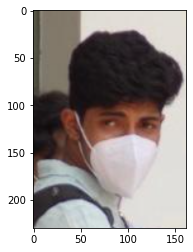

In [3]:
plt.imshow(img)

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset = train.flow_from_directory("./training/",
                                          target_size=(150,150),
                                          batch_size=3,
                                          class_mode='binary')
validation_dataset = validation.flow_from_directory("./validation/",
                                          target_size=(150,150),
                                          batch_size=3,
                                          class_mode='binary')

Found 39 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
                              tf.keras.layers.MaxPool2D(2,2),
                              #
                              tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
                              tf.keras.layers.MaxPool2D(2,2),
                              #
#                               tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(150,150,3)),
#                               tf.keras.layers.MaxPool2D(2,2),
                              ##
                              tf.keras.layers.Flatten(),
                              ##
                              tf.keras.layers.Dense(512,activation="relu"),
                              ##
                              tf.keras.layers.Dense(1,activation="sigmoid")
                             ])

In [33]:
model.compile(loss="binary_crossentropy",
             optimizer= RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [36]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 2,
                     epochs = 20,
                     validation_data = validation_dataset)

Epoch 1/20
2/2 [==============================] - 1s 503ms/step - loss: 1.0668 - accuracy: 0.6667 - val_loss: 0.3279 - val_accuracy: 0.9444
Epoch 2/20
2/2 [==============================] - 1s 476ms/step - loss: 0.1300 - accuracy: 1.0000 - val_loss: 0.2338 - val_accuracy: 0.8889
Epoch 3/20
2/2 [==============================] - 1s 471ms/step - loss: 0.0888 - accuracy: 1.0000 - val_loss: 0.4461 - val_accuracy: 0.7778
Epoch 4/20
2/2 [==============================] - 1s 460ms/step - loss: 0.2278 - accuracy: 0.8333 - val_loss: 0.3590 - val_accuracy: 0.8333
Epoch 5/20
2/2 [==============================] - 1s 492ms/step - loss: 0.2055 - accuracy: 1.0000 - val_loss: 0.2550 - val_accuracy: 0.8333
Epoch 6/20
2/2 [==============================] - 1s 504ms/step - loss: 0.0618 - accuracy: 1.0000 - val_loss: 0.1628 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 1s 463ms/step - loss: 0.0908 - accuracy: 1.0000 - val_loss: 0.3546 - val_accuracy: 0.7778
Epoch 8/20
2/2 [====

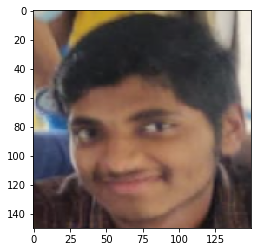

1/1 [==============================] - 0s 29ms/step
No Mask is detected


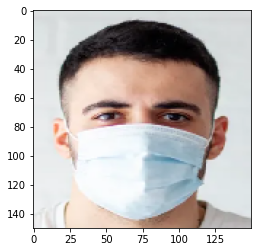

1/1 [==============================] - 0s 32ms/step
Mask is detected 10.png


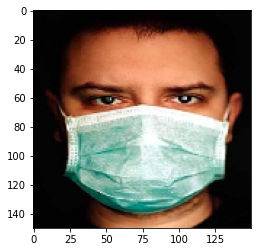

1/1 [==============================] - 0s 25ms/step
Mask is detected 11.png


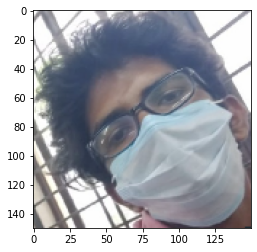

1/1 [==============================] - 0s 24ms/step
No Mask is detected


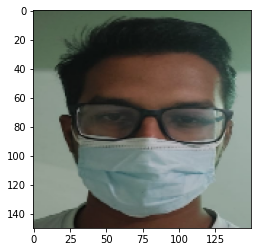

1/1 [==============================] - 0s 28ms/step
Mask is detected 13.png


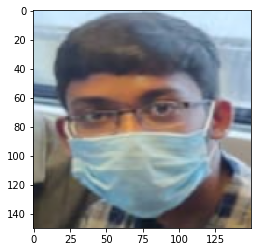

1/1 [==============================] - 0s 26ms/step
No Mask is detected


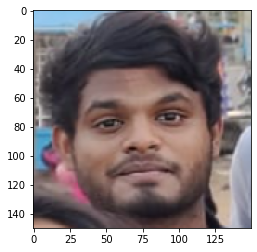

1/1 [==============================] - 0s 25ms/step
No Mask is detected


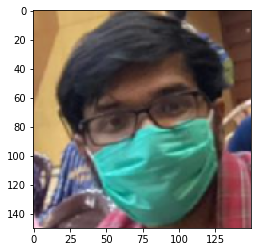

1/1 [==============================] - 0s 27ms/step
Mask is detected 16.png


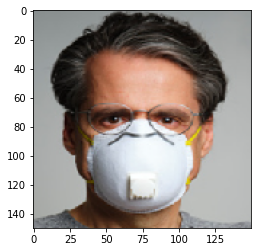

1/1 [==============================] - 0s 25ms/step
Mask is detected 17.png


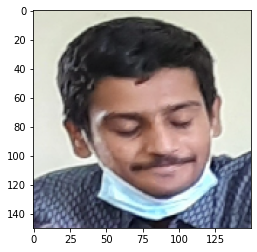

1/1 [==============================] - 0s 26ms/step
No Mask is detected


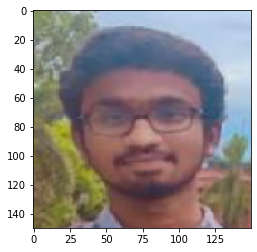

1/1 [==============================] - 0s 25ms/step
No Mask is detected


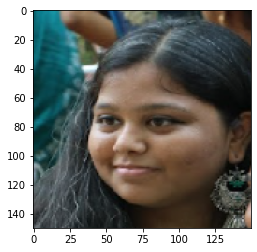

1/1 [==============================] - 0s 25ms/step
No Mask is detected


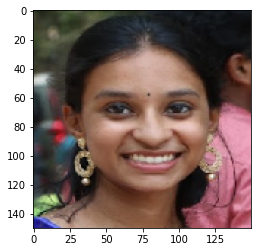

1/1 [==============================] - 0s 25ms/step
No Mask is detected


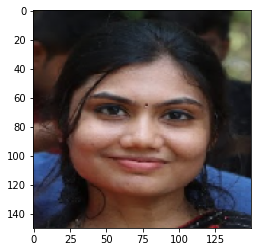

1/1 [==============================] - 0s 25ms/step
No Mask is detected


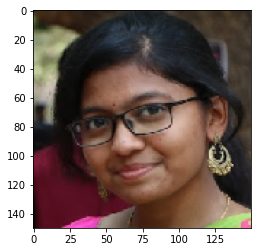

1/1 [==============================] - 0s 26ms/step
No Mask is detected


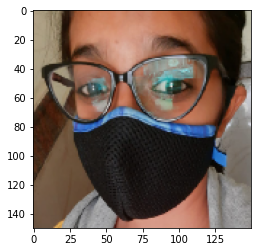

1/1 [==============================] - 0s 26ms/step
Mask is detected 6.png


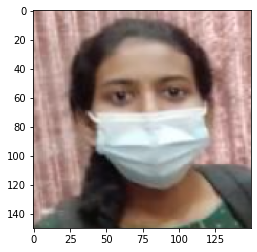

1/1 [==============================] - 0s 26ms/step
Mask is detected 7.png


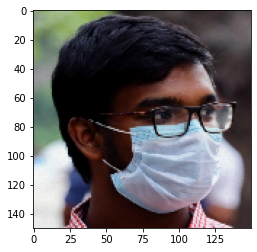

1/1 [==============================] - 0s 25ms/step
Mask is detected 8.png


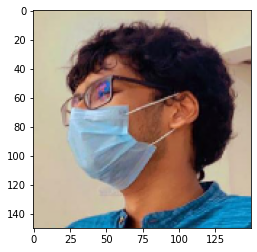

1/1 [==============================] - 0s 24ms/step
No Mask is detected


In [37]:
dir_path = "./testing"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(150,150))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    if(val==0):
        print("Mask is detected",i)
    else:
        print("No Mask is detected")

In [10]:
num_classes = len(class_names)

data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.Normalization(),
        tf.keras.layers.Resizing(img_height, img_width), 
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(factor=0.02),
        tf.keras.layers.RandomZoom(
            height_factor=0.4, width_factor=0.4
        ),
    ],
    name="data_augmentation",
)

NameError: name 'class_names' is not defined